# HW 2

**Upload two files** to Gradescope: 
* `HW2.py` (which will be autograded)
* `HW2.ipynb` (run all cells to make sure that outputs are visible, especially plots)

**Reminder:** For the assignments in this course, **you must write your own code**. Copying code from the internet or other sources is not allowed. Using Python functions that have not been covered in class may make exercises easier than intended. Please ask if you are not sure what is allowed.

___

In [2]:
import math
import random
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.animation as ani

### Asymptotic Notation

Let $f(n) = (\log n)^{10}$. Determine whether $f(n)$ is $$\Theta(g(n)),\quad O(g(n)),\quad o(g(n)),\quad \Omega(g(n)),\quad \omega(g(n))$$
for each of the following $g(n)$. Uncomment the statements below and assign the value of `True` or `False` to each variable. Justification is not necessary.

* $g_1(n) = n\log n$

In [5]:
f_is_Theta_g1 = False
f_is_Big_O_g1 = True
f_is_Little_o_g1 = True
f_is_Big_Omega_g1 = False
f_is_Little_omega_g1 = False

* $g_2(n) = \log n^{10}$

In [6]:
f_is_Theta_g2 = False
f_is_Big_O_g2 = False
f_is_Little_o_g2 = False
f_is_Big_Omega_g2 = True
f_is_Little_omega_g2 = True

* $g_3(n) = (\log n)^{9} + (\log n)^8$

In [7]:
f_is_Theta_g3 = False
f_is_Big_O_g3 = False
f_is_Little_o_g3 = False
f_is_Big_Omega_g3 = True
f_is_Little_omega_g3 = True

### Function Exceed Threshold
Suppose `func(n)` is a monotonically increasing function. We wish to find the largest integer `n` such that `func(n)` is less than or equal to a given threshold. (Assume the function exceeds the threshold for some `n`.)

**Version 1:** Write a function **`exceed_func1(func, thresh)`** that finds the largest `n` by examining the positive integers 1, 2, ..., in order, one at a time. 

Example:  
```
func = lambda n: n**3
exceed_func1(func, 10**6)
``` 
returns `100` because it is the largest integer that satisfies $n^3 \le 10^6$.

In [9]:
def exceed_func1(func, thresh):
    n=1
    while func(n) <= thresh:
        n+=1
    return n-1


In [10]:
func = lambda n: n**3
exceed_func1(func, 10**6)

100

In [11]:

exceed_func1(func, 10**6)



100

**Version 2:** A quicker way to find the largest `n` is to first find the interval $\left[2^k, 2^{k+1}\right]$, bounded by consecutive powers of 2, that contains `n`, then examine only the integers in that interval. Assume $k\ge 1$. Write a function **exceed_func2(func, thresh)** that uses this method to return the answer.

In [12]:
def exceed_func2(func,thresh):
    k=1 
    while func(2**k) <= thresh:
        k+=1
    n=2**(k-1)
    while func(n) <= thresh:
        n+=1
    return n-1

    

In [13]:

exceed_func2(func, 10**6)

100

### Comparison of Input Sizes for Different $T(n)$ Functions
Suppose an algorithm can solve a problem in $T(n)$ microseconds for input size $n$. (A *microsecond* is a millionth of a second.) Each of the following $T(n)$ functions corresponds to the running time for an algorithm:

$$\begin{align*}
  T_1(n) &= n^3\\
  T_2(n) &= 10^6\sqrt n\\
  T_3(n) &= 100n\log_2(n)\\
  T_4(n) &= 10n^2\\
  T_5(n) &= n^2\log_2(n)\\
  T_6(n) &= (1.1)^n\\
  T_7(n) &= n!
\end{align*}$$

**For each $T(n)$, determine the largest input size $n$ that can be solved in 1 second, 1 minute, or 1 hour.**

Example: Consider $T_1(n)=n^3$. If $n\le 100$, then $T_1(n) \le 10^6$ microseconds, so the running time will be no more than 1 second. Similarly, if $n\le 391$, then $T_1(n) \le 60\cdot 10^6$ microseconds, so the running time will be no more than 1 minute.

**Write code to generate a table** like the one below, **calculating the missing entries** by calling `exceed_func2`. It is not necessary to exactly match the format of the table. (*Hint:* You may wish to use `math.log2()` and `math.factorial()`.)

```
  T(n)     1 second    1 minute      1 hour
--------------------------------------------
  T_1        100          391         
  T_2
  T_3
  T_4
  T_5
  T_6
  T_7
```



In [2]:
lst=['1','2']

'kasd2'

In [14]:
func_lst = [lambda n: n**3, lambda n: (10**6)*math.sqrt(n), lambda n: 100*n*math.log2(n), lambda n: 10*(n**2), lambda n: (n**2)*math.log2(n), lambda n: 1.1**n, lambda n: math.factorial(n)]

In [16]:
i=1
print(f' T(n)     1 second   1 minute    1 hour \n -------------------------------------')
for n in func_lst:
    print(f' T_{i}       {exceed_func2(n, 10**6)}         {exceed_func2(n, 60*10**6)}       {exceed_func2(n, (3600*(10**6)))}')
    i+=1

 T(n)     1 second   1 minute    1 hour 
 -------------------------------------
 T_1       100         391       1532
 T_2       1         3600       12960000
 T_3       1002         39311       1736782
 T_4       316         2449       18973
 T_5       344         2316       16052
 T_6       144         187       230
 T_7       9         11       12


### Recursive Cumulative Sum
Write a recursive version of the cumulative sum function called **`cum_sum_rec(nums)`**. 

Note: Your function should work for small lists. It need not work for large lists which may generate a `RecursionError`. To find the maximum recursion depth for your version of Python, call
```
import sys
sys.getrecursionlimit() 
```

In [17]:
import sys
sys.getrecursionlimit()

3000

In [ ]:
[1,2,3]
[1,3,6]


In [36]:
def cum_sum_rec(nums):
    if len(nums) == 1:
        return nums
    else:
        prev_cum_sum = cum_sum_rec(nums[:-1])
        current_sum = prev_cum_sum[-1] + nums[-1]
        return prev_cum_sum + [current_sum]

In [37]:
cum_sum_rec([1,2,3,4,5,6,7,8,9,10])

[1, 3, 6, 10, 15, 21, 28, 36, 45, 55]

In [ ]:
sum([1,2,3,4,5,6,7,8,9,10]), np.cumsum([1,2,3,4,5,6,7,8,9,10])

(55, array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55]))

### A Recursively Defined Sequence
Consider the sequence $a_1 = a_2 = 2$, $a_n = a_{n-1} + 2a_{n-2}$. 

$$\{2, 2, 6, 10, \ldots \}$$

Write a recursive function **`seq_rec(n)`** to return the $n^{th}$ term of the sequence for $n\ge 1$. 

In [ ]:
def seq_rec(n):
    if n == 2 or n == 1:
        return 2
    else:
        return seq_rec(n-1) + 2*seq_rec(n-2)



In [ ]:
seq_rec(5)

22

Now write a non-recursive version of the function called **`seq(n)`**.

In [ ]:
def seq(n):
    a1=a2=2
    if n == 1 or n ==2:
        return a1
    seq_val=0
    k=2
    while k != n:
        seq_val = a1 + 2*a2
        a2 = a1
        a1 = seq_val
        k+=1
    return seq_val


In [ ]:
seq(5)

22

### LR Curve

The **LR Curve** draws a path in the 2D plane consisting of one-unit horizontal and vertical segments. The curve begins in one of four directions (East, North, West, South), then changes directions by making Left (L) and Right (R) turns. Here is a sample curve.

<img src = "http://www.coloradomath.org/python/lr_curve_8.jpg" width="458" height="446" />

An **LR string** specifies the moves that draw an LR curve. It can be defined recursively using the following rules. Begin with 'L', then repeatedly do the following:
* Concatenate three strings: 
  * the current string
  * the letter 'L'
  * a second string which is identical to the current string except that the center character is flipped (from L to R or R to L).  

Note that these rules produce strings of odd length only. Here are the first few LR strings:
1. 'L'
2. 'L' + 'L' + 'R' $\rightarrow$ 'LLR'
3. 'LLR' + 'L' + 'LRR' $\rightarrow$ 'LLRLLRR'

and their corresponding images, starting with a segment pointing in the East direction:

<img src = "http://www.coloradomath.org/python/LRcurves.jpg" width="608" height="180"/>

For this exercise, the sequence of steps begin with 'L'. They can be adapted to begin with 'R' instead.

Write a **recursive** function **LR_string(string, reps)** that takes a string containing an odd number of Ls and Rs, and applies the above rules for the given number of repetitions.

Examples:<br>
`LR_string('L', 2)` returns `'LLRLLRR'`.<br>
`LR_string('LLR', 1)` returns `'LLRLLRR'`.<br>
`LR_string('L', 0)` returns `'L'`.


In [20]:
def LR_string(string, reps):
    if reps == 0:
        return string
    else:
        if len(string) == 1:
            return LR_string(string + 'LR', reps -1)
        if string[len(string)//2] == 'L':
            return LR_string(string + 'L' + string[:len(string)//2] +'R'+ string[len(string)//2+1:], reps-1)
        elif string[len(string)//2] == 'R':
            return LR_string(string + 'L' + string[:len(string)//2] +'L'+ string[len(string)//2+1:], reps-1)

In [ ]:
LR_string('L',2), LR_string('LLR', 1), LR_string('L', 3)

('LLRLLRR', 'LLRLLRR', 'LLRLLRRLLLRRLRR')

L LLR LLRLLRR LLRLLRRLLLRRLRR

Write a function called **LR_curve(LR, dir)** that takes an LR string as input and draws an LR Curve beginning in one of the 4 directions ('N', 'E', 'S', 'W'). The default direction is 'E'. The large image displayed above corresponds to  `LR_curve(LR_string('L', 8))`.

In [21]:
def LR_curve(LR, dir='E'):
    dir_dict = {'N':[[0,0],[0,1]], 'E':[[0,1],[0,0]], 'S':[[0,0],[0,-1]], 'W':[[0,-1],[0,0]]}
    dir_facing = dir
    plt.axis('off')
    x_coord=dir_dict[dir][0]
    y_coord=dir_dict[dir][1]
    for n in LR:
        if dir_facing == 'N':
            if n =='L':
                x_coord.append(x_coord[-1]-1)
                y_coord.append(y_coord[-1])
                dir_facing = 'W'
            if n == 'R':
                x_coord.append(x_coord[-1]+1)
                y_coord.append(y_coord[-1])
                dir_facing = 'E'
        elif dir_facing == 'E':
            if n =='L':
                x_coord.append(x_coord[-1])
                y_coord.append(y_coord[-1]+1)
                dir_facing = 'N'
            if n == 'R':
                x_coord.append(x_coord[-1])
                y_coord.append(y_coord[-1]-1)
                dir_facing = 'S'
        elif dir_facing == 'S':
            if n =='L':
                x_coord.append(x_coord[-1]+1)
                y_coord.append(y_coord[-1])
                dir_facing = 'E'
            if n == 'R':
                x_coord.append(x_coord[-1]-1)
                y_coord.append(y_coord[-1])
                dir_facing = 'W'
        elif dir_facing == 'W':
            if n =='L':
                x_coord.append(x_coord[-1])
                y_coord.append(y_coord[-1]-1)
                dir_facing = 'S'
            if n == 'R':
                x_coord.append(x_coord[-1])
                y_coord.append(y_coord[-1]+1)
                dir_facing = 'N'
    print(f'{len(x_coord) == len(y_coord)}')           
    plt.plot(x_coord,y_coord)
            

        


True


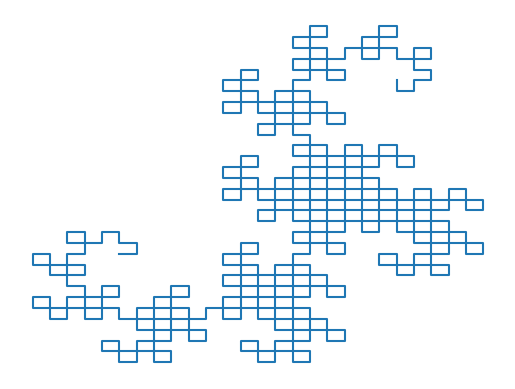

In [ ]:
LR_curve(LR_string('L',8),'E')

**Draw the curve** `LR_curve(LR_string('L', 6), 'S')`.

True


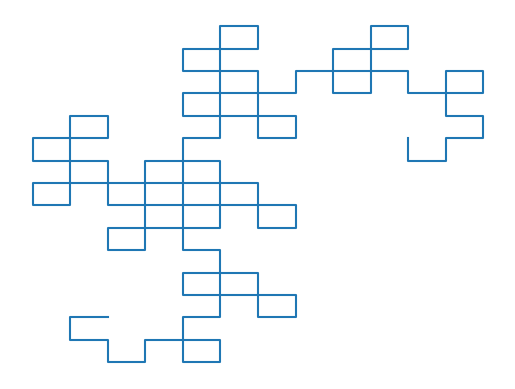

In [ ]:
LR_curve(LR_string('L',6),"S")

**Draw the curve** `LR_curve(LR_string('L', 11))`.

True


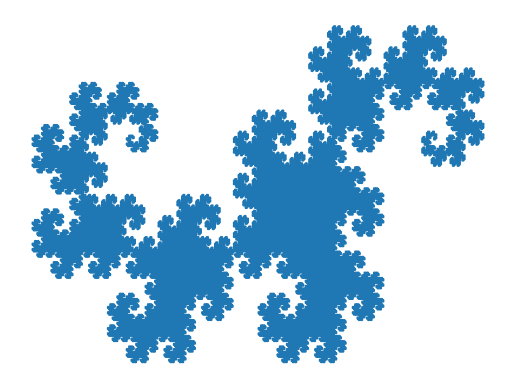

In [26]:
LR_curve(LR_string('L',15))